### Using Titanic dataset: train and test dataset, for predicting and analysing the survival of Passengers based on different features such as - Age, Sex, Pclass, Embarked, Fair, Siblings and parents&children. First detailed EDA analysis is done on train dataset and by fitting different algorithms and models will predict the passenger survival on test data set. In this, we are using following models for fitting and predicting:
#### 1. Logistic Regression
#### 2. SVC and LinearSVC
#### 3. SGDClassifier
#### 4. KNeighborsClassifier
#### 5. DecisionTreeClassifier
#### 6. RandomForest
#### 7. AdaBoostClassifier
#### 8. NaiveBayes
#### 9. XGBoost
#### 10. Perceptron

------------------------------------------------------------------------------

#### 1. Importing the libraries and the datasets

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Datasets is been divided into train and test. All the models will be fitted to train sets and later the best model will use test data to predict.

--------------------------------------------

### EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


looks like, Age, Cabin and Embarked has missing values. Cabin has almost 80% of misssing values, which will contribute no good to prediction, so i will remove the Cabin from both train and test datasets. Age has few missing values, so later i'll impute average age values based on Pclass in it.

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


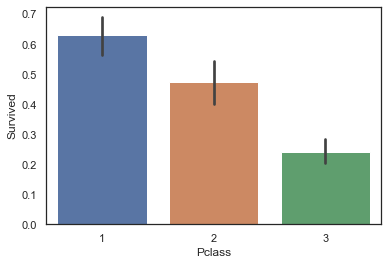

In [9]:
sns.barplot('Pclass', 'Survived', data = train)

###### in above, Pclass 1 has the higher survival rate than the other two class

In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###### In test dataset Survived column is missing, that's for we have to predict the survival chance by fitting the model to train dataset

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# relation between features and survival
survived = train[train['Survived']==0]
not_survived = train[train['Survived']==1]

print("Survived: %i (%.1f%%)" % (len(survived), float(len(survived))/len(train)*100))
print("Not_Survived: %i (%.1f%%)" % (len(not_survived), float(len(not_survived))/len(train)*100))
print("Total: %i" % len(train))

Survived: 549 (61.6%)
Not_Survived: 342 (38.4%)
Total: 891


### Pclass vs. Survived

In [13]:
# total passengers in different Pclass
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Here we can see that most of the passengers are from Pclass 3

In [14]:
# survival in different Pclass
Pclass_survived = train.groupby('Pclass').Survived.value_counts()
Pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Survival rate is more is higher class(Pclass 1) than other two class

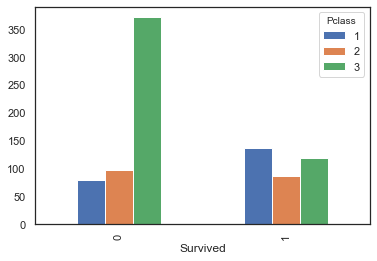

In [15]:
Pclass_survived.unstack(level=0).plot(kind='bar',subplots=False)

In [16]:
Pclass_survived_avg = train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()
Pclass_survived_avg

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


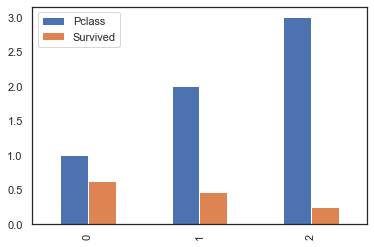

In [17]:
Pclass_survived_avg.plot(kind='bar', subplots=False)

### Sex vs. Survived

In [18]:
# Number of males and females boarded
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

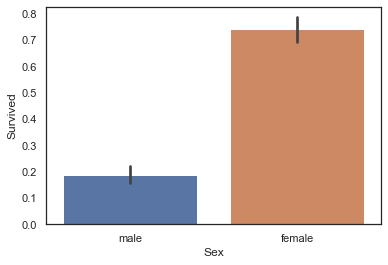

In [19]:
sns.barplot('Sex','Survived', data=train)

Though female is less than male, survival of females are greater than male. Females and children are more likely to survive than males

In [20]:
sex_survived = train.groupby('Sex').Survived.value_counts()
sex_survived

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

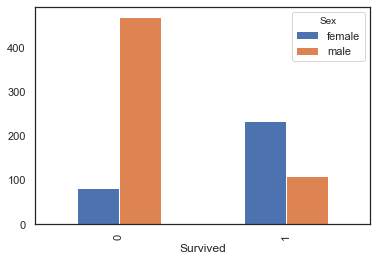

In [21]:
sex_survived.unstack(level=0).plot(kind='bar', subplots=False)

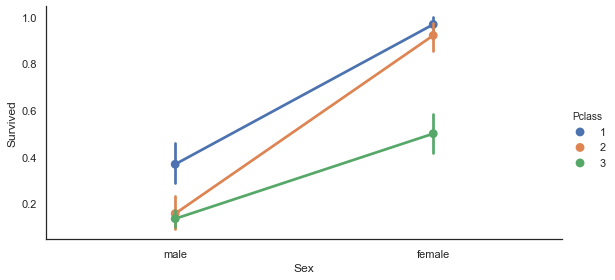

In [22]:
# seeing the survival based on Pclass
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

 Observing the above fatorplot, almost all the females survived in higher Pclass(1 and2). In Pclass 3, females are less survived. for males, those were from Pclass_1, survived but their survival were less than than of females. in lower Pclass very few males were survived.

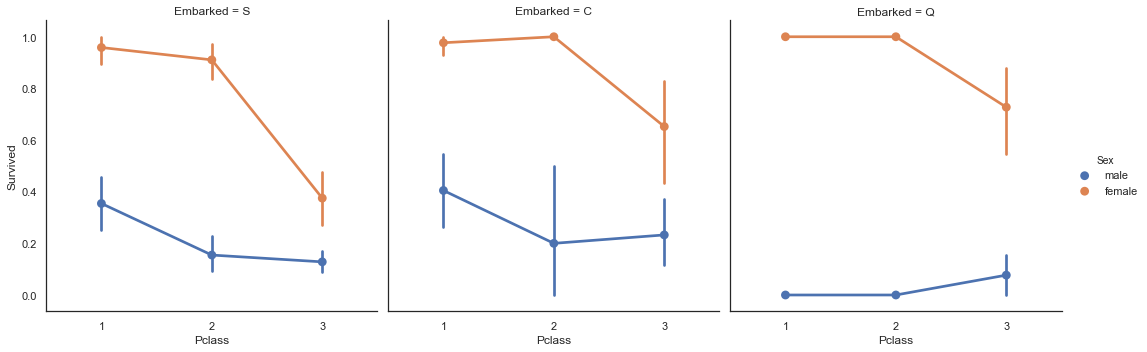

In [23]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

### Emabarked vs. Survived

In [24]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

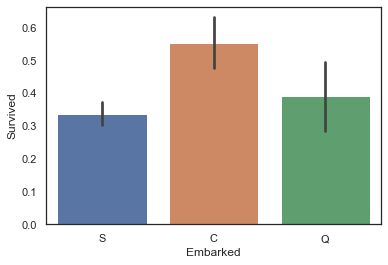

In [26]:
sns.barplot('Embarked', 'Survived', data=train)

In [27]:
Embarked_survived_avg = train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()
Embarked_survived_avg

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


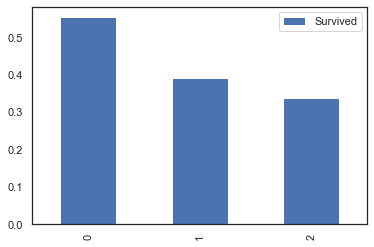

In [28]:
Embarked_survived_avg.plot(kind='bar', subplots=False)

### Sex vs. Survived

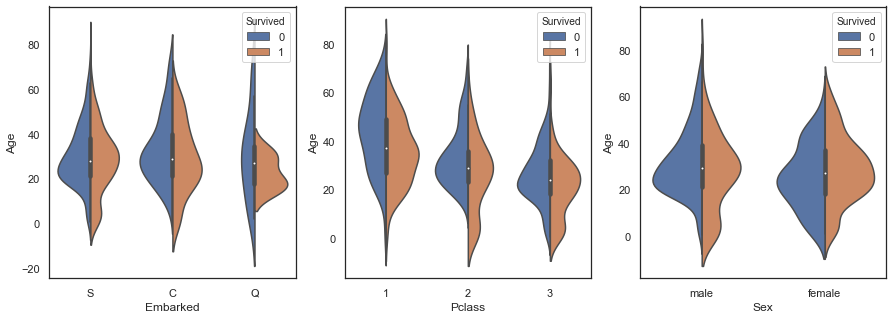

In [29]:
# showing the survival rate based on Embarked, Pclass, Sex by violinplot

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot('Embarked', 'Age', hue = 'Survived', data=train, split=True, ax=ax1)
sns.violinplot('Pclass', 'Age', hue = 'Survived', data=train, split=True, ax=ax2)
sns.violinplot('Sex', 'Age', hue = 'Survived', data=train, split=True, ax=ax3)

In above violinplots, in Pclass section, all the mid-aged passengers survived in class_1, in class 2 and class 3, older people were less likely to survived. Similarly, from Sex section, almost all the females were survived from children to older age, males in older age were less likely to survived.

In [30]:
# Distribution plot based on survival rate

total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]

total_male_survived = train[(train['Survived']==1) & (train['Sex']=='male')]
total_female_survived = train[(train['Survived']==1) & (train['Sex']=='female')]

male_not_survived = train[(train['Survived']==0) & (train['Sex']=='male')]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=='female')]


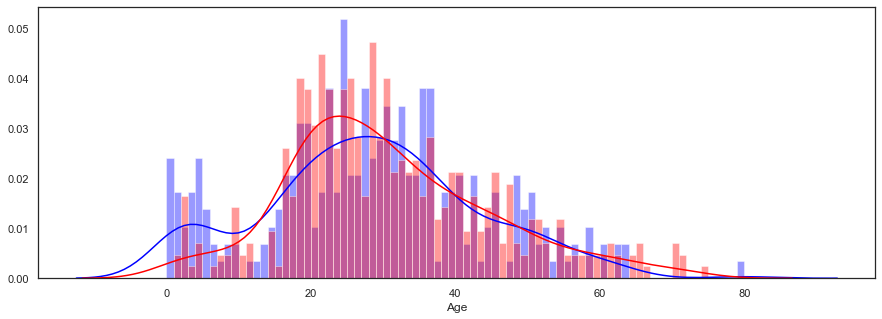

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(111)

sns.distplot(total_survived['Age'].dropna().values, kde=True, bins=range(0,81,1), color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, kde=True, bins=range(0,81,1), color='red', axlabel = 'Age')

Here we see that, survival rate of children aged between 0 to 12/or 14 is greater. passengers between 15 to 30 or 35 is less survived. again survival chances increased for the mid-aged people till 40. 

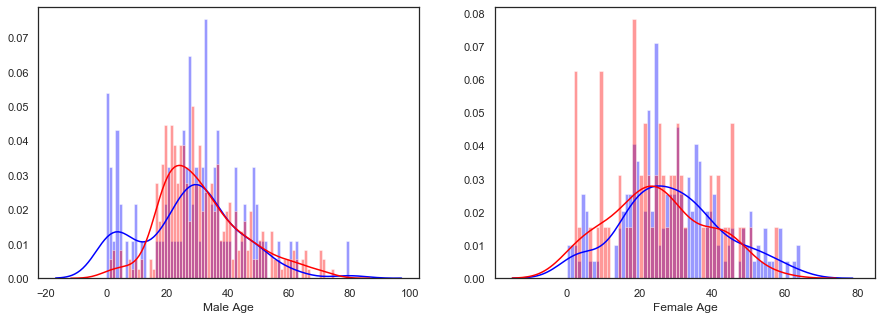

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(total_male_survived['Age'].dropna().values, kde=True, bins=range(0,81,1), color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, kde=True, bins=range(0,81,1), color='red', axlabel= 'Male Age')

plt.subplot(122)
sns.distplot(total_female_survived['Age'].dropna().values, kde=True, bins=range(0,81,1), color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, kde=True, bins=range(0,81,1), color='red', axlabel= 'Female Age')


Survival rate for male children aged between 0 to 14 is greater and older male passenger. Survival rate for female above age 25 something is greater than that of below 25.



## Feature Selection & Engineering

In [33]:
# 1. Missing Values in train dataset
# 2. defining a function for missing values

def missing_value(train):
    total = train.isnull().sum().sort_values(ascending=False)
    percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
    return missing_data

missing_value(train)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


we can see here that Age has 177 missing values and Cabin has 687 missing values. Cabin has almost all the values missing so we can drop cabin from dataset, and for Age, we will replace all themissing values with average Age based on Pclass.

In [34]:
def missing_value(test):
    total = test.isnull().sum().sort_values(ascending=False)
    percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
    return missing_data

missing_value(test)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


here also, Age and Cabin row has the most values missing, since Cabin has almost all the missing values so we will drop the Cabin from test dataset and For Age, will follow the same as for in train_datatset.

In [35]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [36]:
test = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [37]:
# Average Age for different Pclass

train.groupby(['Pclass']).Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

similarly for test_dataset

In [38]:
test.groupby(['Pclass']).Age.mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [39]:
# defining the function which will used later on for replacing missing values for Age.

def Age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [40]:
# defining the function which will used later on for replacing missing values for Age.

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 41
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [41]:
train['Age'] = train[['Age','Pclass']].apply(Age_approx, axis=1)
test['Age'] = test[['Age','Pclass']].apply(age_approx, axis=1)

In [42]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [43]:
# dropping the embarked missing value 
train.dropna(inplace=True)

In [44]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [45]:
test.dropna(inplace=True)

In [46]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [48]:
# Changing the categorical value for Sex and Embarked in both train and test dataset
# to avoid dummy trap, using drop_first=True

train_dummied = pd.get_dummies(train, columns=["Sex"], drop_first = True)
train_dummied = pd.get_dummies(train_dummied, columns=["Embarked"], drop_first = True)

In [49]:
test_dummied = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test_dummied = pd.get_dummies(test_dummied, columns=["Embarked"], drop_first=True)

In [50]:
train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [51]:
test_dummied.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [52]:
X = train_dummied.drop(['Survived'], axis=1)
y=train_dummied['Survived']

In [53]:
# Splitting the data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [54]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform
test_dummied = independent_scalar.transform(test_dummied)

## Feature Scaling  and categorical encoding is not required for tree-based model model.
# Random Forest
# Decision Tree
# Adaboost

------------

###    Fitting the model

###### 1. Logistic Regression

In [55]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.7752808988764045

In [57]:
confusion_matrix(y_test, y_pred)

array([[132,  25],
       [ 35,  75]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       157
           1       0.75      0.68      0.71       110

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



 For Logistic Regression, accuracy is 77.5%

#### 2. SVC

In [59]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [60]:
print(accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

0.8014981273408239
[[145  12]
 [ 41  69]]


For SVC, accuracy is 80.14%

#### 3. LinearSVM

In [61]:
linear_svc = LinearSVC()

In [62]:
linear_svc.fit(X_train,y_train)
y_pred_linear_svc = linear_svc.predict(X_test)

print(accuracy_score(y_test, y_pred_linear_svc))
print(confusion_matrix(y_test, y_pred_linear_svc))

0.7790262172284644
[[133  24]
 [ 35  75]]


For LinearSVM, accuracy is 77.9%

#### 4. SGDClassifier

In [63]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)

print(accuracy_score(y_test, y_pred_sgd))

0.7415730337078652


for SGDClassifier, accuracy is 68.9%

#### 5. KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

0.7640449438202247
[[128  29]
 [ 34  76]]


#### 6. DecisionTree

In [65]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred_dt)

array([[132,  25],
       [ 39,  71]], dtype=int64)

In [67]:
accuracy_score(y_test, y_pred_dt)

0.7602996254681648

For DecisionTreeClassifier, accuracy is 76%

#### 7. Random Forest

In [68]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

[[136  21]
 [ 33  77]]
0.797752808988764


In [69]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.79      0.70      0.74       110

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



for Random Forest, accuracy is 79%

#### 8. Naive Bayes

In [70]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

0.7565543071161048
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       157
           1       0.70      0.71      0.71       110

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



For Naive Bayes, accuracy is 76%

#### 9. AdaBoost Classifier

In [71]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred_abc)

0.7752808988764045

For AdaBoostClassifier, accuracy is 77.5%

#### 10. XGBoost

In [73]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred_xgb)

0.8014981273408239

For XGBoost, accuracy is 80.14%

#### 11. Perceptron

In [75]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred_perceptron)

0.7153558052434457

For Perceptron, accuracy is 71.15%

### ................Best fitted model is SVC and XGBoost.....................

Above used all the individuals model are just fitted on data which is randomly splitted but for only once. Models are fitted on just train data, and predicted on test data. This can't give the most accurate results, as only few data is fitted and another set is predicted. Here we will use cross-Validation technique, where data is splited in n different sets and fitted and predicted simultanuously on every sets, so that every sets are been trained for models and then the mean is calculated for every accuracy.

---------------------------------

### KNN model tuning ---
##### using Grid Search & cross-validation

In [77]:
# Importing the libraries

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

In [78]:
k_values = np.array([1,3,5,7,9,11,13,15])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid_result = grid.fit(X_train,y_train)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, sdv,param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, sdv, param))


Best: 0.829582 using {'n_neighbors': 11}
0.765273 (0.062258) with: {'n_neighbors': 1}
0.799035 (0.053929) with: {'n_neighbors': 3}
0.813505 (0.058226) with: {'n_neighbors': 5}
0.811897 (0.058144) with: {'n_neighbors': 7}
0.826367 (0.048894) with: {'n_neighbors': 9}
0.829582 (0.055590) with: {'n_neighbors': 11}
0.826367 (0.055901) with: {'n_neighbors': 13}
0.823151 (0.057398) with: {'n_neighbors': 15}


by using GridSearch, we got that best estimator for KNN is n_neighbors=11, with accuracy 82.9% which can be improved by taking n_neighbors more into account.

---------------------

### Estimating the accuracy for every model while using cross-validation technique

In [80]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('Linear_SVC', LinearSVC()))
models.append(('SGD', SGDClassifier(max_iter=5, tol=None)))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators = 100)))
models.append(('abc', AdaBoostClassifier()))
models.append(('Perceptron', Perceptron(max_iter=5, tol=None)))
models.append(('XGBoost', XGBClassifier()))

In [81]:
results =[]
names =[]
for name, model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))

LR: 0.816692 (0.050273)
SVC: 0.842422 (0.037668)
Linear_SVC: 0.816743 (0.056275)
SGD: 0.741091 (0.040635)
NB: 0.795699 (0.069624)
DT: 0.789478 (0.063939)
RF: 0.813466 (0.060732)
abc: 0.819918 (0.041191)
Perceptron: 0.716897 (0.090361)
XGBoost: 0.831157 (0.051661)


#### checking the model performance

In [82]:
# defining Learning curve function

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [83]:
# defining validation curve function

def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)


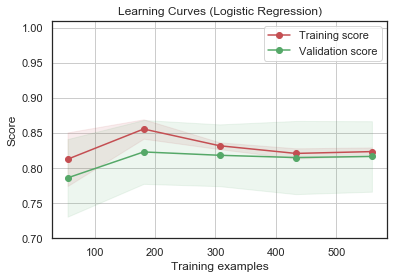

In [84]:
# Plot learning curves LOGISTIC REGRESSION
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(lr, title, X_train, y_train, ylim=(0.7, 1.01), cv=10, n_jobs=1);

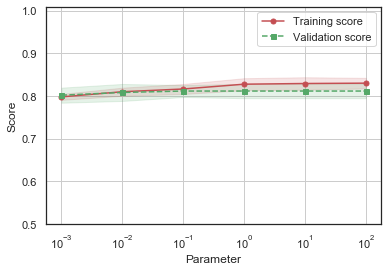

In [85]:
# Plot validation curve lOGISTIC REGRESSION
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=lr, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);

<module 'matplotlib.pyplot' from 'C:\\Users\\Asit\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

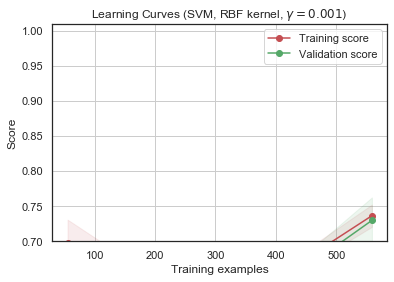

In [86]:
# Plot learning curves with SVM

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = 10
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

well, I don't know what happened here, I might have done something wrong I guess. If you can guide me it'll be great help to me to understand.

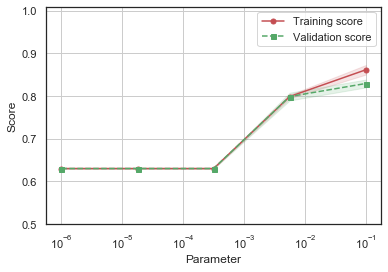

In [87]:
# validation plot with SVM

title = 'Validation Curve (Naive Bayes)'
param_name = 'gamma'
param_range = np.logspace(-6,-1,5) 
cv = 10
plot_validation_curve(estimator=svc, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);

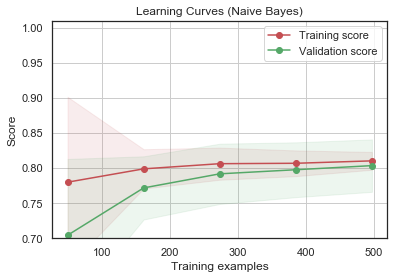

In [88]:
# learning plot with NAIVE BAYES

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = "Learning Curves (Naive Bayes)"
plot_learning_curve(nb, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4);

#### Algorithm Comparison

[Text(0, 0, 'LR'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'Linear_SVC'),
 Text(0, 0, 'SGD'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'abc'),
 Text(0, 0, 'Perceptron'),
 Text(0, 0, 'XGBoost')]

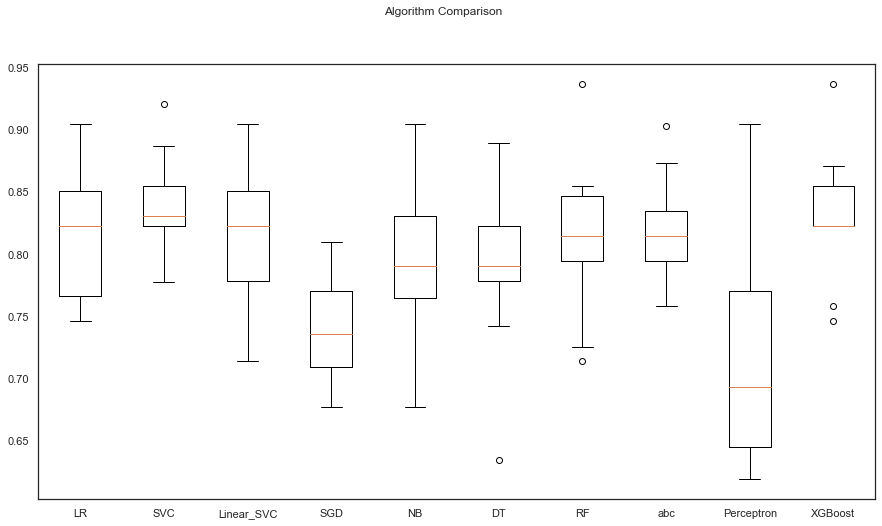

In [89]:
fig = plt.figure(figsize = (15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

#### XGBoost and SVC has the most accurate result with the accuracy of XGBoost = 83% and SVC = 84%, followed by AdaBoost(81.9%) and RandomForest(81.3%). Earlier in case without cross-validation, accuracy score of XGBoost and SVC was 80.14%.
we can do Hyperparameter Tuning for each model and can find even more accurate result.

### Prediction on Validation dataset i.e., test dataset

for prediction we will use XGBoost model

In [90]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_valid_xgb = xgb.predict(test_dummied)

### ---------- Hyperparameter Tuning

#### --- 1. Logistictic Regression

In [93]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)

(889, 8)
(889,)
(622, 8)
(622,)


In [95]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806149 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801650 (0.035502) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.804274 (0.035626) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801275 (0.035243) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.801275 (0.035243) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802400 (0.032999) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.800900 (0.034837) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.802775 (0.035514) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.805024 (0.034715) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.799025 (0.035351) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.805399 (0.033963) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.806149 (0.033635) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.795276 (0.039426) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.736408 (0.030728) with: {

in above, i am using data X,y which is not scaled. and the [accuracy is 80.6%, with solver 'lbfgs']

In [97]:
# defining  the mode and parameters

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.823687 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.819936 (0.054666) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.819936 (0.054666) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.819936 (0.054666) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.819936 (0.054666) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.819936 (0.054666) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.819936 (0.054666) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.820472 (0.055083) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.820472 (0.055083) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820472 (0.055678) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.823687 (0.054673) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823687 (0.054673) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.815113 (0.058686) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.823687 (0.048229) wit

in above, i am using scaled data, X_train and y_train.. for which accuracy is [82.36% and solver is 'newton-cg']

#### --- 2. Ridge Classifier

In [99]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.811897 using {'alpha': 0.1}
0.811897 (0.053771) with: {'alpha': 0.1}
0.811897 (0.053771) with: {'alpha': 0.2}
0.811897 (0.053771) with: {'alpha': 0.3}
0.811897 (0.053771) with: {'alpha': 0.4}
0.811897 (0.053771) with: {'alpha': 0.5}
0.811897 (0.053771) with: {'alpha': 0.6}
0.811897 (0.053771) with: {'alpha': 0.7}
0.811897 (0.053771) with: {'alpha': 0.8}
0.811897 (0.053771) with: {'alpha': 0.9}
0.811897 (0.053771) with: {'alpha': 1.0}


[accuracy is 81.18% with alpha 0.1]

#### --- 3. KNN

In [100]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.830654 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
0.764737 (0.051559) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.764737 (0.051559) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.809218 (0.060414) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.784566 (0.058542) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.816720 (0.055850) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.796356 (0.057926) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.822615 (0.060369) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.794748 (0.055402) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.818864 (0.054811) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.795284 (0.054129) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.823687 

[accuracy is 83.06%, metric - 'manhattan', n_neighbors = 15, weight = 'uniform']

#### --- 4. SVC

In [101]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.841372 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.809753 (0.055712) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.810825 (0.055448) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.719185 (0.060844) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.816720 (0.053621) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.832797 (0.057101) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.725616 (0.064687) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.830118 (0.050207) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.841372 (0.045909) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.732047 (0.063626) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.755627 (0.035090) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.812969 (0.046785) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.792069 (0.047902) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.647374 (0.013625) with: {'C': 0.01, 'gamma': 'scale',

[accuracy is 84.13% using 'C':1.0, 'gamma': scale, 'kernel': rbf]

#### --- 5. Bagged Decision Tree(Bagging)

In [102]:
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.807074 using {'n_estimators': 100}
0.803323 (0.056132) with: {'n_estimators': 10}
0.807074 (0.061412) with: {'n_estimators': 100}
0.807074 (0.059055) with: {'n_estimators': 1000}


[accuracy is 80.7%, n_estimators(no. of trees) = 100]

#### --- 6. Random Forest

In [103]:
# define models and parameters

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813505 using {'max_features': 'log2', 'n_estimators': 10}
0.798499 (0.058646) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.806002 (0.056106) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.811361 (0.057044) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.813505 (0.057006) with: {'max_features': 'log2', 'n_estimators': 10}
0.810825 (0.055102) with: {'max_features': 'log2', 'n_estimators': 100}
0.811361 (0.056878) with: {'max_features': 'log2', 'n_estimators': 1000}


[accuracy is 81.35%] 

#### --- 7. Stocastic Gradient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.840300 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.630225 (0.002367) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.630225 (0.002367) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.630225 (0.002367) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.630225 (0.002367) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.630225 (0.002367) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.630225 (0.002367) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.826367 (0.051260) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.828510 (0.053374) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.824759 (0.052510) with: {'learning_rate': 0.001, 'ma

accuracy is 84%

#### --- 8. XGBoost Classifier

In [107]:
# defining model and parameters

model = XGBClassifier()
n_estimators = [1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.8, 0.9, 1.0]
max_depth = [3, 4, 5]
colsample_bytree = [0.8, 0.9, 1.0]
gamma = [0,1,5]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth, 
            colsample_bytree = colsample_bytree, gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score='raise')
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.847267 using {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}
0.834405 (0.057302) with: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}
0.837621 (0.054244) with: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.9}
0.833869 (0.054189) with: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1.0}
0.833869 (0.059708) with: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.8}
0.836549 (0.058834) with: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}
0.833869 (0.063212) with: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 1.0

The accuracy is 0.847267 using {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}

---------------------------------

### -------- Model Ranking ----------

##### 1. XGBoost - (accuracy: 84.7%)
##### 2. SVC - (accuracy: 84.13%)
##### 3. SGD - (accuracy: 84.03%)
##### 4. KNN - (accuracy: 83.06%)
##### 5. Logistic Regression - (accuracy: 82.36%)
##### 6. Random Forest - (accuracy: 81.35%)
##### 7. Ridge Classifier - (accuracy: 81.18%)
##### 8. Bagging - (accuracy - 80.7%)